In [1]:
install.packages("BAS")


  There is a binary version available but the source version is later:
    binary source needs_compilation
BAS  1.5.5  1.6.0              TRUE

  Binaries will be installed
package 'BAS' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\waelr\AppData\Local\Temp\Rtmp0WIQHf\downloaded_packages


In [2]:
data(UScrime, package = "MASS")

In [3]:
UScrime[, -2] <- log(UScrime[, -2])

In [4]:
library(BAS)

In [5]:
UScrimeData<-as.data.frame(UScrime)

In [6]:
str(UScrimeData)

'data.frame':	47 obs. of  16 variables:
 $ M   : num  5.02 4.96 4.96 4.91 4.95 ...
 $ So  : int  1 0 1 0 0 0 1 1 1 0 ...
 $ Ed  : num  4.51 4.73 4.49 4.8 4.8 ...
 $ Po1 : num  4.06 4.63 3.81 5 4.69 ...
 $ Po2 : num  4.03 4.55 3.78 4.95 4.62 ...
 $ LF  : num  6.23 6.37 6.28 6.36 6.38 ...
 $ M.F : num  6.86 6.92 6.88 6.9 6.89 ...
 $ Pop : num  3.5 2.56 2.89 5.06 2.89 ...
 $ NW  : num  5.71 4.62 5.39 4.38 3.4 ...
 $ U1  : num  4.68 4.56 4.54 4.62 4.51 ...
 $ U2  : num  3.71 3.58 3.5 3.66 3 ...
 $ GDP : num  5.98 6.32 5.76 6.51 6.36 ...
 $ Ineq: num  5.56 5.27 5.52 5.12 5.16 ...
 $ Prob: num  -2.47 -3.52 -2.48 -4.15 -3.18 ...
 $ Time: num  3.27 3.23 3.19 3.4 3.06 ...
 $ y   : num  6.67 7.4 6.36 7.59 7.12 ...


In [7]:
summary(UScrimeData)


       M               So               Ed             Po1       
 Min.   :4.779   Min.   :0.0000   Min.   :4.466   Min.   :3.807  
 1st Qu.:4.868   1st Qu.:0.0000   1st Qu.:4.580   1st Qu.:4.135  
 Median :4.913   Median :0.0000   Median :4.682   Median :4.357  
 Mean   :4.928   Mean   :0.3404   Mean   :4.654   Mean   :4.387  
 3rd Qu.:4.984   3rd Qu.:1.0000   3rd Qu.:4.740   3rd Qu.:4.649  
 Max.   :5.176   Max.   :1.0000   Max.   :4.804   Max.   :5.112  
      Po2              LF             M.F             Pop       
 Min.   :3.714   Min.   :6.174   Min.   :6.839   Min.   :1.099  
 1st Qu.:4.069   1st Qu.:6.274   1st Qu.:6.872   1st Qu.:2.303  
 Median :4.290   Median :6.328   Median :6.884   Median :3.219  
 Mean   :4.329   Mean   :6.328   Mean   :6.890   Mean   :3.126  
 3rd Qu.:4.575   3rd Qu.:6.385   3rd Qu.:6.900   3rd Qu.:3.725  
 Max.   :5.056   Max.   :6.463   Max.   :6.976   Max.   :5.124  
       NW               U1              U2             GDP       
 Min.   :0.6931  

In [8]:
UScrimeData[,-2] = log(UScrime[,-2])

Warning message in FUN(X[[i]], ...):
"NaNs produced"


In [9]:
USCrimeBas<- bas.lm(y ~ ., data = UScrimeData,prior = 'BIC', modelprior = uniform())


Warning message in bas.lm(y ~ ., data = UScrimeData, prior = "BIC", modelprior = uniform()):
"dropping  47 rows due to missing data"


ERROR: Error in bas.lm(y ~ ., data = UScrimeData, prior = "BIC", modelprior = uniform()): Sample size is zero; check data and subset arguments


In [10]:
crime.ZS <- bas.lm(y ~ .,
  data = UScrime,
  prior = "ZS-null",
  modelprior = uniform(), initprobs = "eplogp",
  force.heredity = FALSE, pivot = TRUE
)

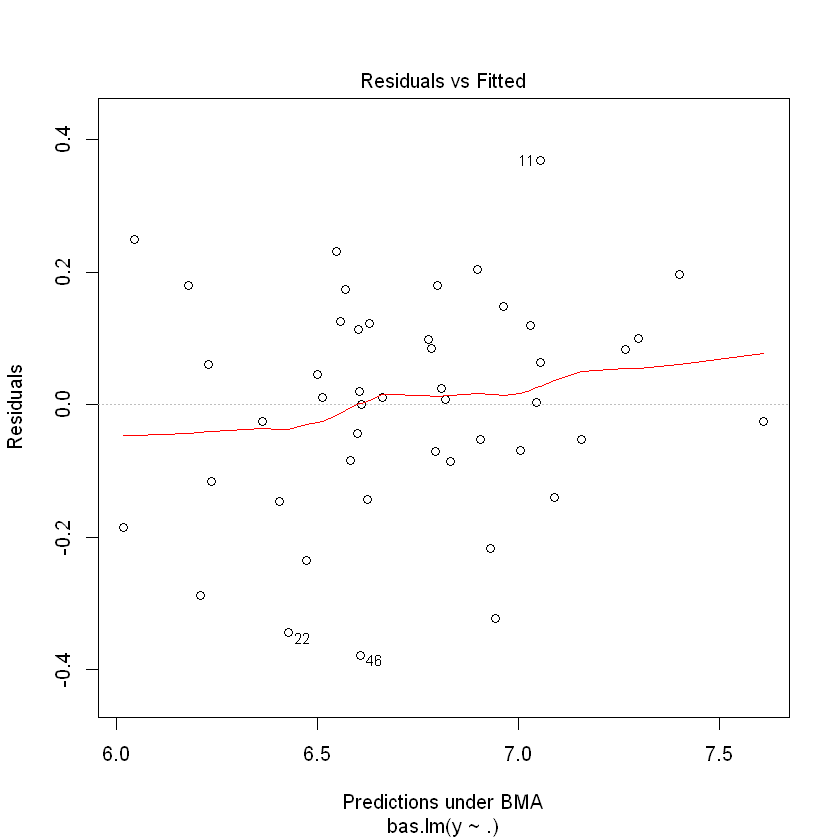

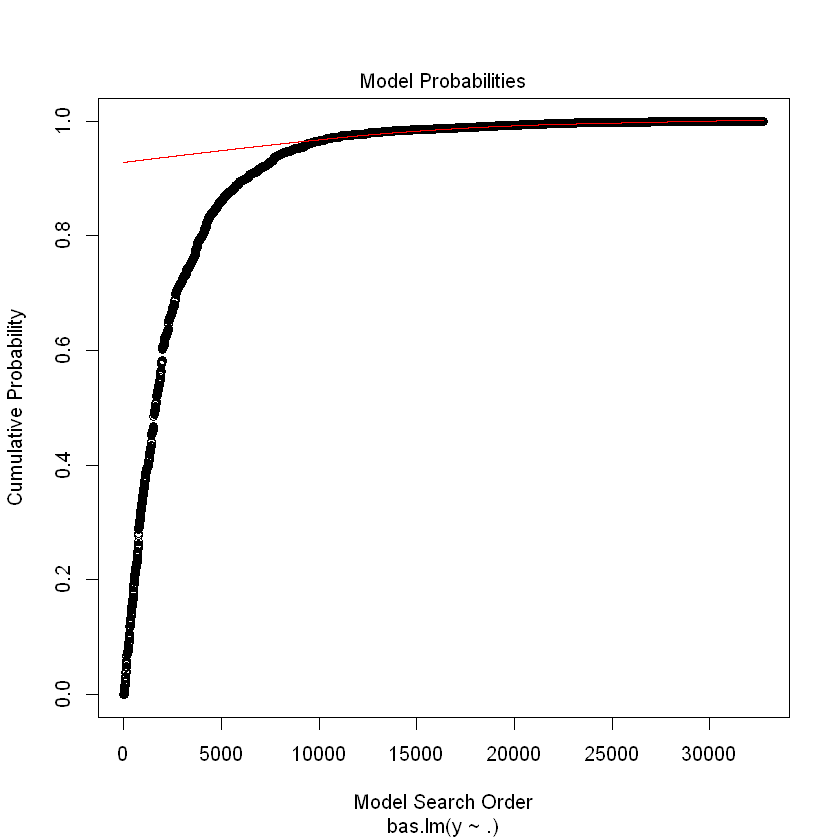

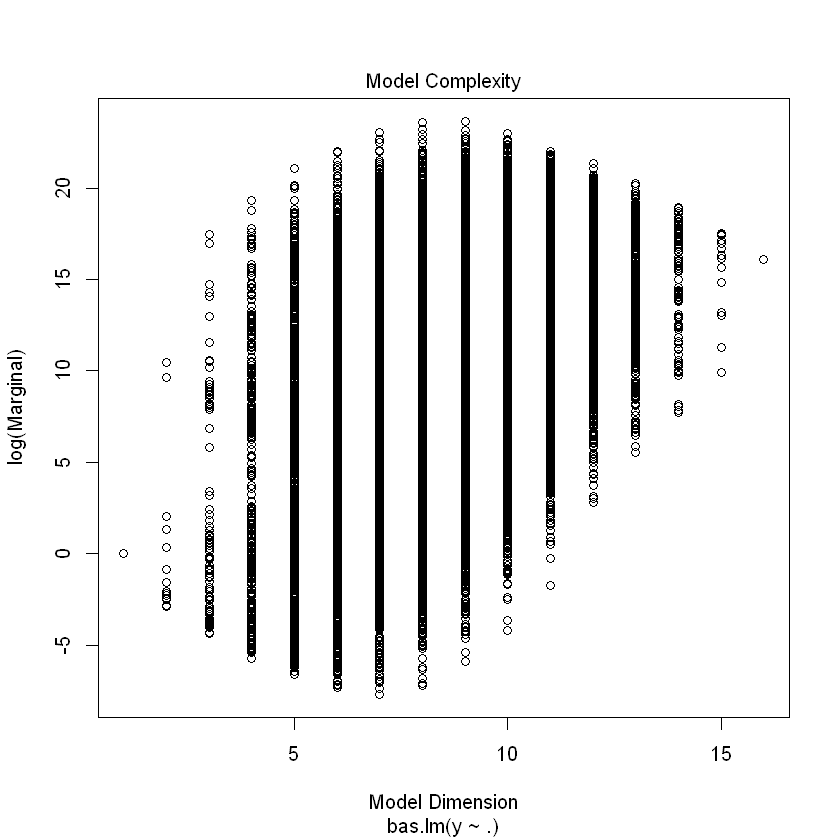

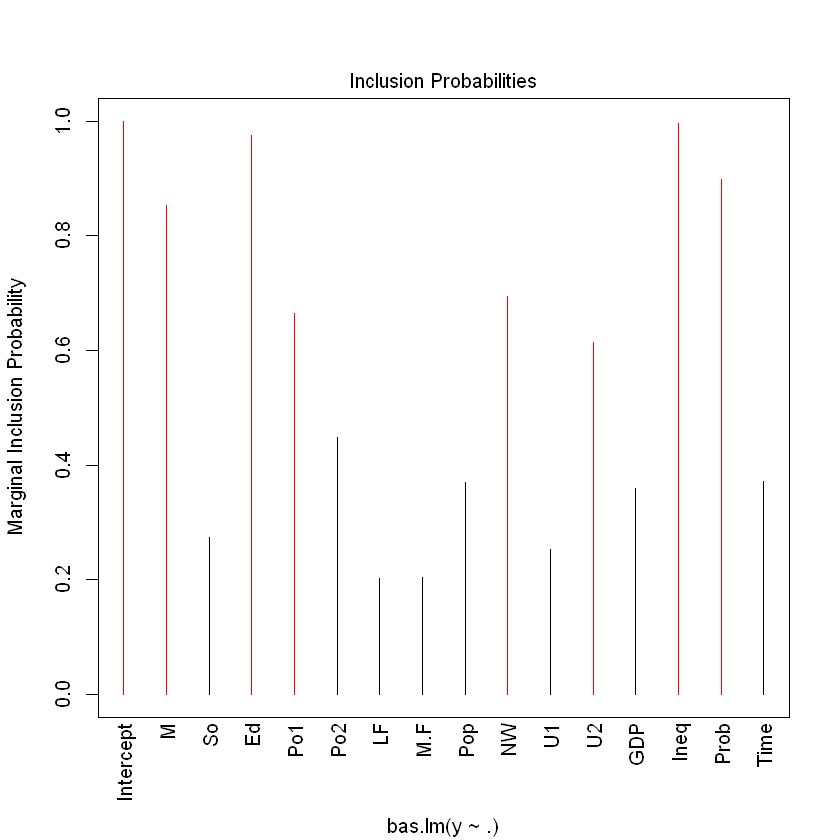

In [11]:
plot(crime.ZS, ask = F)

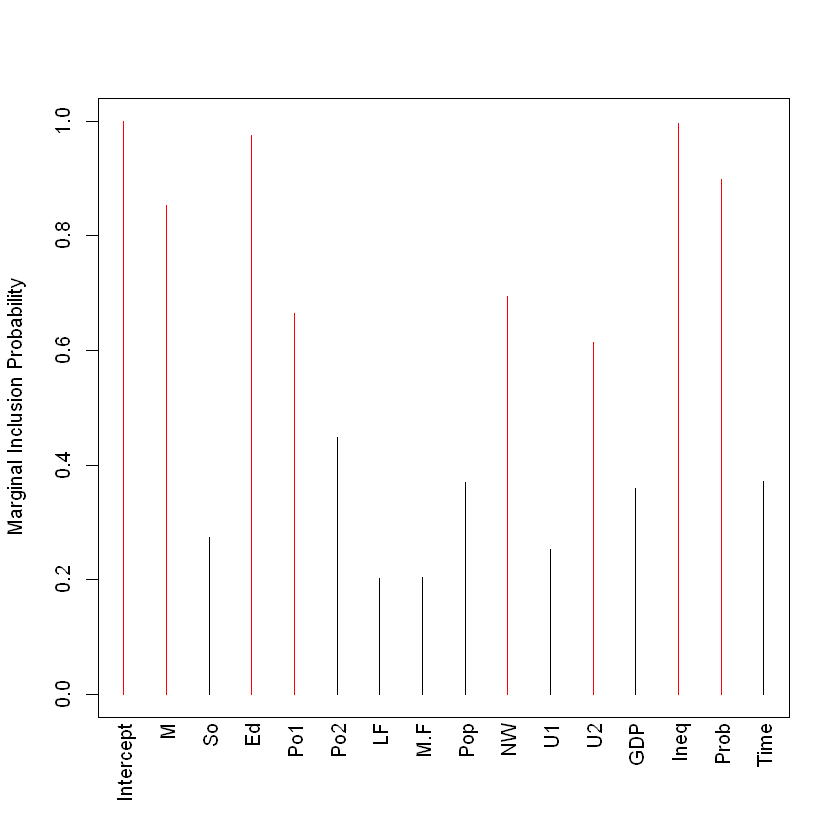

In [12]:
plot(crime.ZS, which = 4, ask = FALSE, caption = "", sub.caption = "")

In [13]:
crime.ZS


Call:
bas.lm(formula = y ~ ., data = UScrime, prior = "ZS-null", modelprior = uniform(), 
    initprobs = "eplogp", force.heredity = FALSE, pivot = TRUE)


 Marginal Posterior Inclusion Probabilities: 
Intercept          M         So         Ed        Po1        Po2         LF  
   1.0000     0.8536     0.2737     0.9747     0.6652     0.4490     0.2022  
      M.F        Pop         NW         U1         U2        GDP       Ineq  
   0.2050     0.3696     0.6944     0.2526     0.6149     0.3601     0.9965  
     Prob       Time  
   0.8992     0.3718  

In [14]:
options(width = 80)
summary(crime.ZS)

,P(B != 0 | Y),model 1,model 2,model 3,model 4,model 5
Intercept,1.0000000,1.00000,1.0000000,1.0000000,1.000000,1.0000000
M,0.8535720,1.00000,1.0000000,1.0000000,1.000000,1.0000000
So,0.2737083,0.00000,0.0000000,0.0000000,0.000000,0.0000000
Ed,0.9746605,1.00000,1.0000000,1.0000000,1.000000,1.0000000
Po1,0.6651553,1.00000,1.0000000,0.0000000,1.000000,1.0000000
Po2,0.4490097,0.00000,0.0000000,1.0000000,0.000000,0.0000000
LF,0.2022374,0.00000,0.0000000,0.0000000,0.000000,0.0000000
M.F,0.2049659,0.00000,0.0000000,0.0000000,0.000000,0.0000000
Pop,0.3696150,0.00000,0.0000000,0.0000000,1.000000,0.0000000
NW,0.6944069,1.00000,1.0000000,1.0000000,1.000000,0.0000000


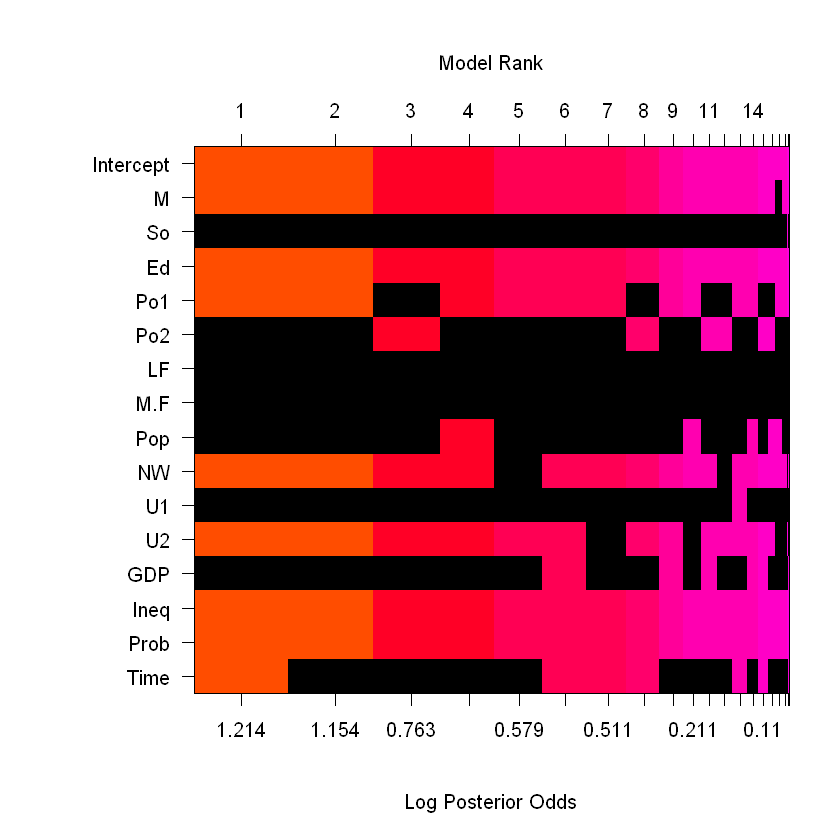

In [15]:
image(crime.ZS, rotate = F)

In [16]:
coef.ZS <- coef(crime.ZS)

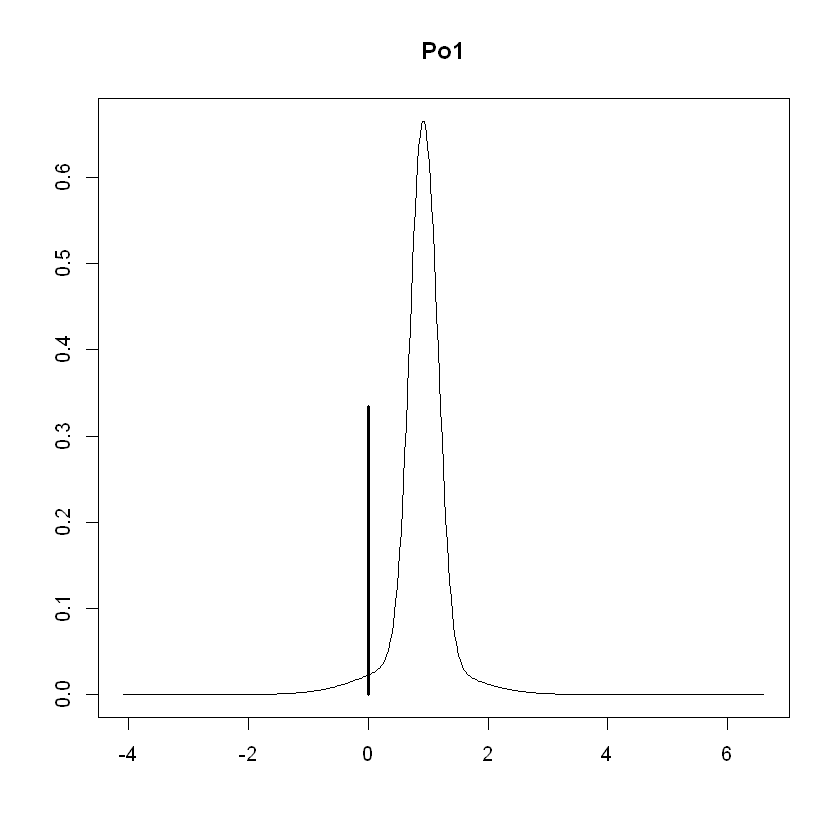

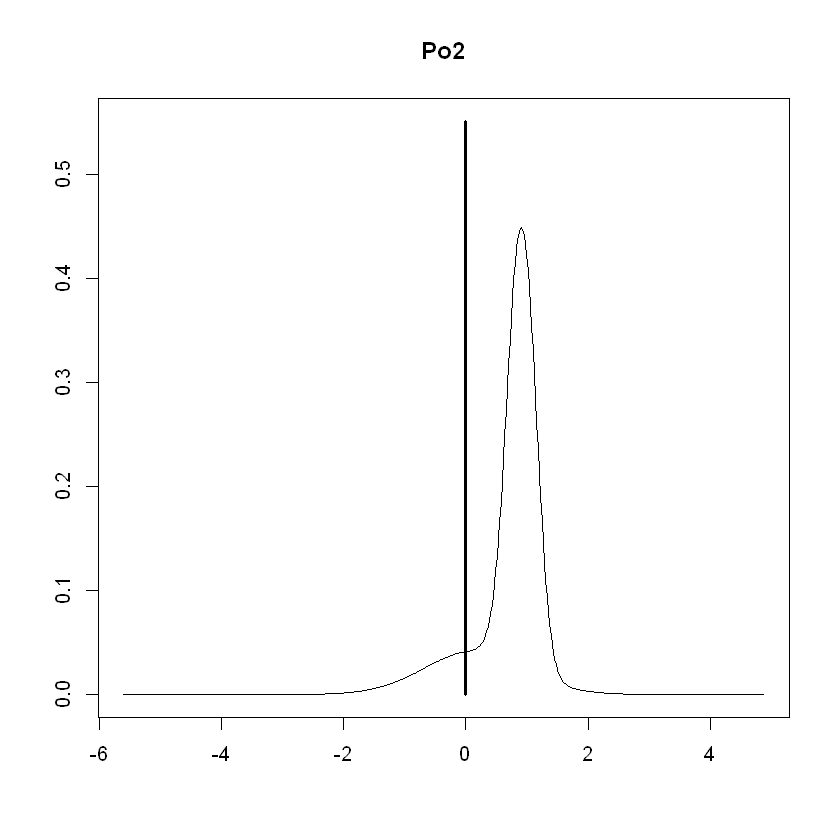

In [17]:
plot(coef.ZS, subset = c(5:6), ask = F)

In [18]:
confint(coef.ZS)

                  2.5%       97.5%        beta
Intercept  6.669193231 6.781663059  6.72493620
M          0.000000000 2.181127827  1.14359433
So        -0.045688039 0.323791348  0.03547522
Ed         0.601503164 3.176353242  1.85848834
Po1        0.000000000 1.412292450  0.60067372
Po2       -0.193354949 1.427566078  0.31841766
LF        -0.543597787 0.947147369  0.05933737
M.F       -2.089154553 2.066183506 -0.02702786
Pop       -0.125046683 0.005510373 -0.02248283
NW         0.000000000 0.164560274  0.06668437
U1        -0.540163745 0.331648474 -0.02456854
U2        -0.009035668 0.643933426  0.20702927
GDP       -0.016635307 1.155552424  0.20625063
Ineq       0.657998129 2.086829535  1.39012647
Prob      -0.404756923 0.000000000 -0.21536203
Time      -0.483499233 0.087079703 -0.08433479
attr(,"Probability")
[1] 0.95
attr(,"class")
[1] "confint.bas"

NULL

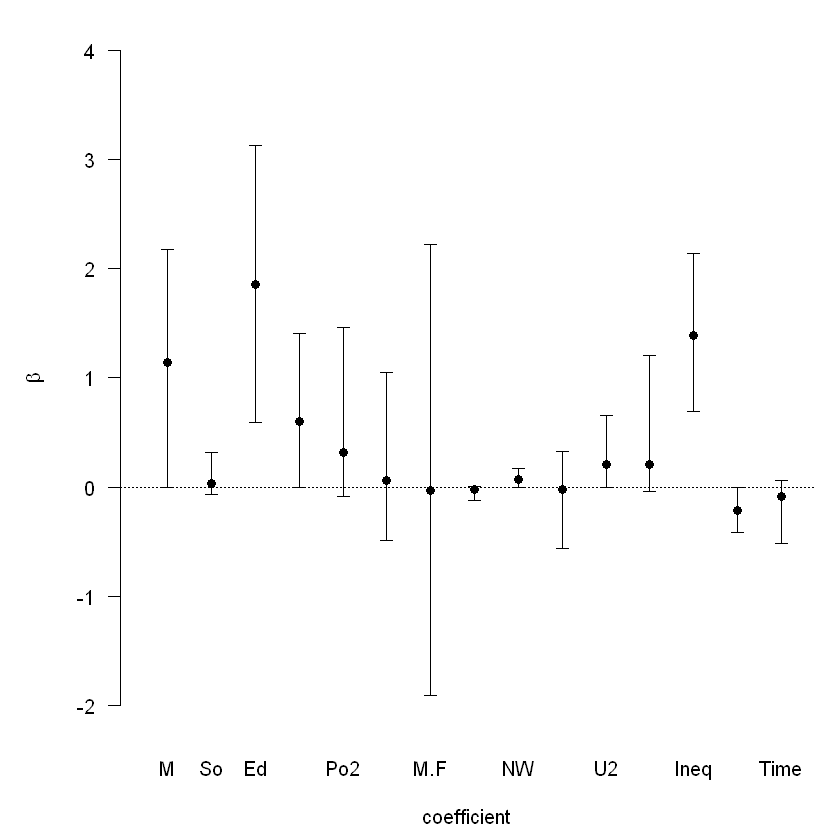

In [19]:
plot(confint(coef.ZS, parm = 2:16))

NULL

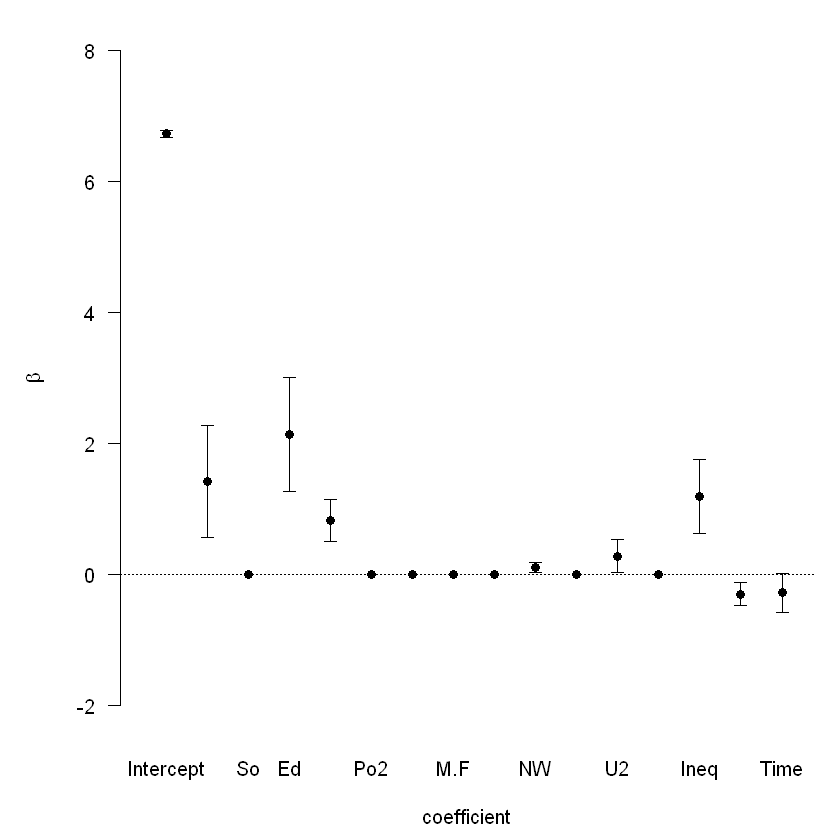

In [20]:
plot(confint(coef(crime.ZS, estimator = "HPM")))

NULL

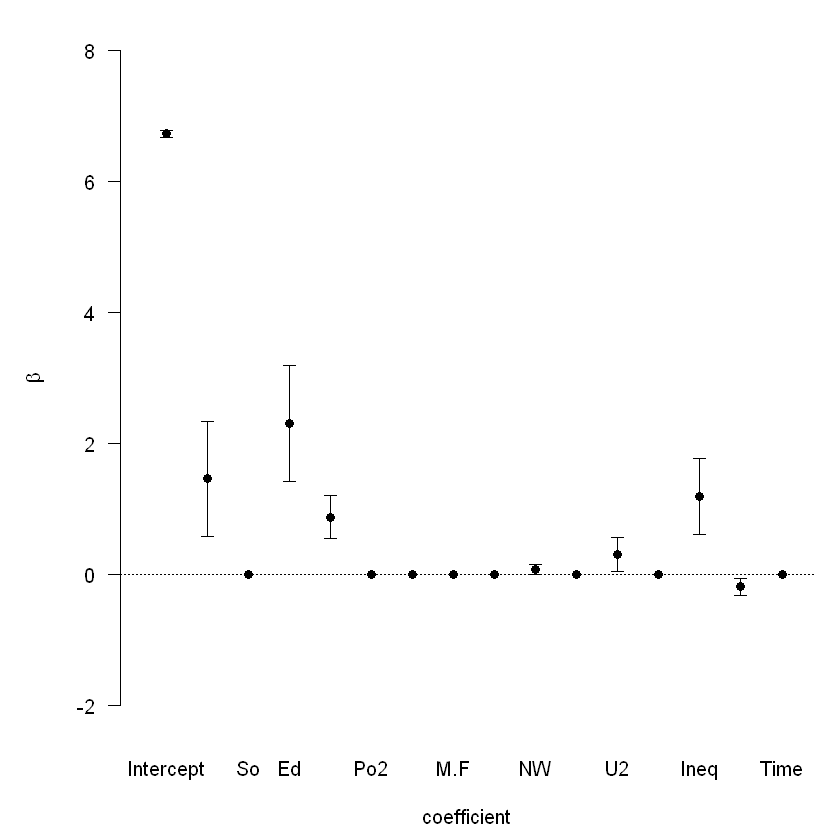

In [21]:
plot(confint(coef(crime.ZS, estimator = "MPM")))

In [22]:
muhat.BMA <- fitted(crime.ZS, estimator = "BMA")
BMA <- predict(crime.ZS, estimator = "BMA")

# predict has additional slots for fitted values under BMA, predictions under each model
names(BMA)

[1] "fit"         "Ybma"        "Ypred"       "postprobs"   "se.fit"     
 [6] "se.pred"     "se.bma.fit"  "se.bma.pred" "df"          "best"       
[11] "bestmodel"   "best.vars"   "estimator"

In [23]:
UScrimeData[,-2] = log(UScrime[,-2])

Warning message in FUN(X[[i]], ...):
"NaNs produced"


In [24]:
summary(UScrimeData)

       M               So               Ed             Po1       
 Min.   :1.564   Min.   :0.0000   Min.   :1.496   Min.   :1.337  
 1st Qu.:1.583   1st Qu.:0.0000   1st Qu.:1.522   1st Qu.:1.420  
 Median :1.592   Median :0.0000   Median :1.544   Median :1.472  
 Mean   :1.595   Mean   :0.3404   Mean   :1.538   Mean   :1.476  
 3rd Qu.:1.606   3rd Qu.:1.0000   3rd Qu.:1.556   3rd Qu.:1.537  
 Max.   :1.644   Max.   :1.0000   Max.   :1.569   Max.   :1.632  
                                                                 
      Po2              LF             M.F             Pop         
 Min.   :1.312   Min.   :1.820   Min.   :1.923   Min.   :0.09405  
 1st Qu.:1.403   1st Qu.:1.836   1st Qu.:1.927   1st Qu.:0.83403  
 Median :1.456   Median :1.845   Median :1.929   Median :1.16903  
 Mean   :1.463   Mean   :1.845   Mean   :1.930   Mean   :1.07596  
 3rd Qu.:1.521   3rd Qu.:1.854   3rd Qu.:1.931   3rd Qu.:1.31503  
 Max.   :1.621   Max.   :1.866   Max.   :1.943   Max.   :1.63393  
   

In [25]:
UScrimeData[,-2] = log(UScrime[,-2])


Warning message in FUN(X[[i]], ...):
"NaNs produced"


In [26]:
sqrt(-1)

Warning message in sqrt(-1):
"NaNs produced"


[1] NaN

In [27]:
library(MASS)


Attaching package: 'MASS'


The following object is masked _by_ '.GlobalEnv':

    UScrime




In [28]:
UScrimeData<-as.data.frame(UScrime)

In [29]:
str(UScrimeData)

'data.frame':	47 obs. of  16 variables:
 $ M   : num  5.02 4.96 4.96 4.91 4.95 ...
 $ So  : int  1 0 1 0 0 0 1 1 1 0 ...
 $ Ed  : num  4.51 4.73 4.49 4.8 4.8 ...
 $ Po1 : num  4.06 4.63 3.81 5 4.69 ...
 $ Po2 : num  4.03 4.55 3.78 4.95 4.62 ...
 $ LF  : num  6.23 6.37 6.28 6.36 6.38 ...
 $ M.F : num  6.86 6.92 6.88 6.9 6.89 ...
 $ Pop : num  3.5 2.56 2.89 5.06 2.89 ...
 $ NW  : num  5.71 4.62 5.39 4.38 3.4 ...
 $ U1  : num  4.68 4.56 4.54 4.62 4.51 ...
 $ U2  : num  3.71 3.58 3.5 3.66 3 ...
 $ GDP : num  5.98 6.32 5.76 6.51 6.36 ...
 $ Ineq: num  5.56 5.27 5.52 5.12 5.16 ...
 $ Prob: num  -2.47 -3.52 -2.48 -4.15 -3.18 ...
 $ Time: num  3.27 3.23 3.19 3.4 3.06 ...
 $ y   : num  6.67 7.4 6.36 7.59 7.12 ...


In [30]:
summary(UScrimeData)

       M               So               Ed             Po1       
 Min.   :4.779   Min.   :0.0000   Min.   :4.466   Min.   :3.807  
 1st Qu.:4.868   1st Qu.:0.0000   1st Qu.:4.580   1st Qu.:4.135  
 Median :4.913   Median :0.0000   Median :4.682   Median :4.357  
 Mean   :4.928   Mean   :0.3404   Mean   :4.654   Mean   :4.387  
 3rd Qu.:4.984   3rd Qu.:1.0000   3rd Qu.:4.740   3rd Qu.:4.649  
 Max.   :5.176   Max.   :1.0000   Max.   :4.804   Max.   :5.112  
      Po2              LF             M.F             Pop       
 Min.   :3.714   Min.   :6.174   Min.   :6.839   Min.   :1.099  
 1st Qu.:4.069   1st Qu.:6.274   1st Qu.:6.872   1st Qu.:2.303  
 Median :4.290   Median :6.328   Median :6.884   Median :3.219  
 Mean   :4.329   Mean   :6.328   Mean   :6.890   Mean   :3.126  
 3rd Qu.:4.575   3rd Qu.:6.385   3rd Qu.:6.900   3rd Qu.:3.725  
 Max.   :5.056   Max.   :6.463   Max.   :6.976   Max.   :5.124  
       NW               U1              U2             GDP       
 Min.   :0.6931  

In [37]:
UScrimeData[,-2] <- log(UScrime[,-2])

In [38]:
data(UScrime, package = "MASS")

In [39]:
UScrime[, -2] <- log(UScrime[, -2])

In [40]:
library(BAS)
crime.ZS <- bas.lm(y ~ .,
  data = UScrime,
  prior = "ZS-null",
  modelprior = uniform(), initprobs = "eplogp",
  force.heredity = FALSE, pivot = TRUE
)

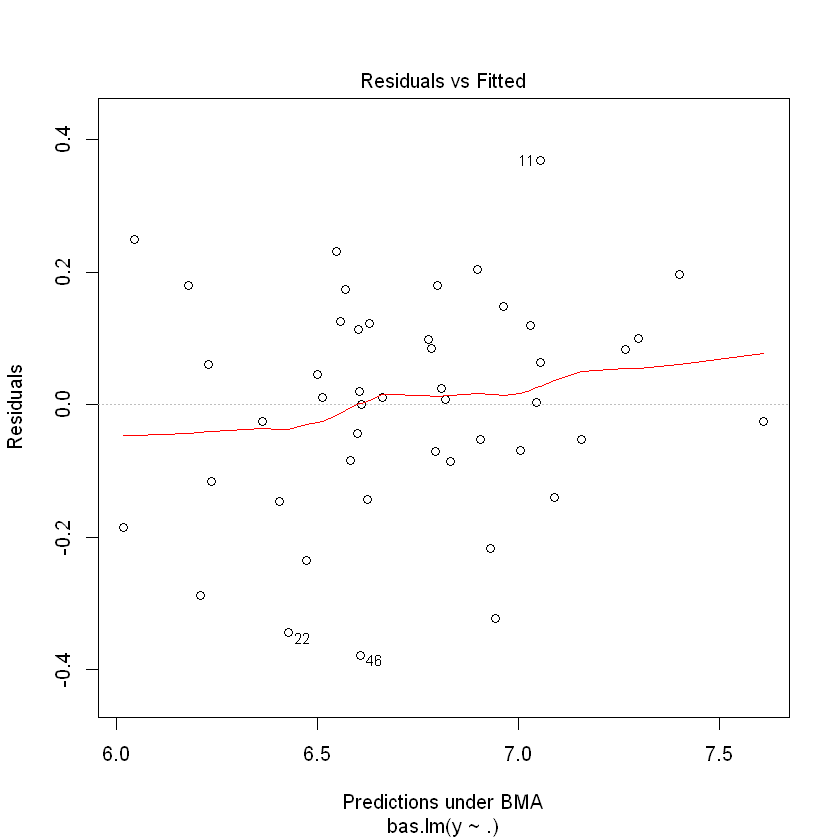

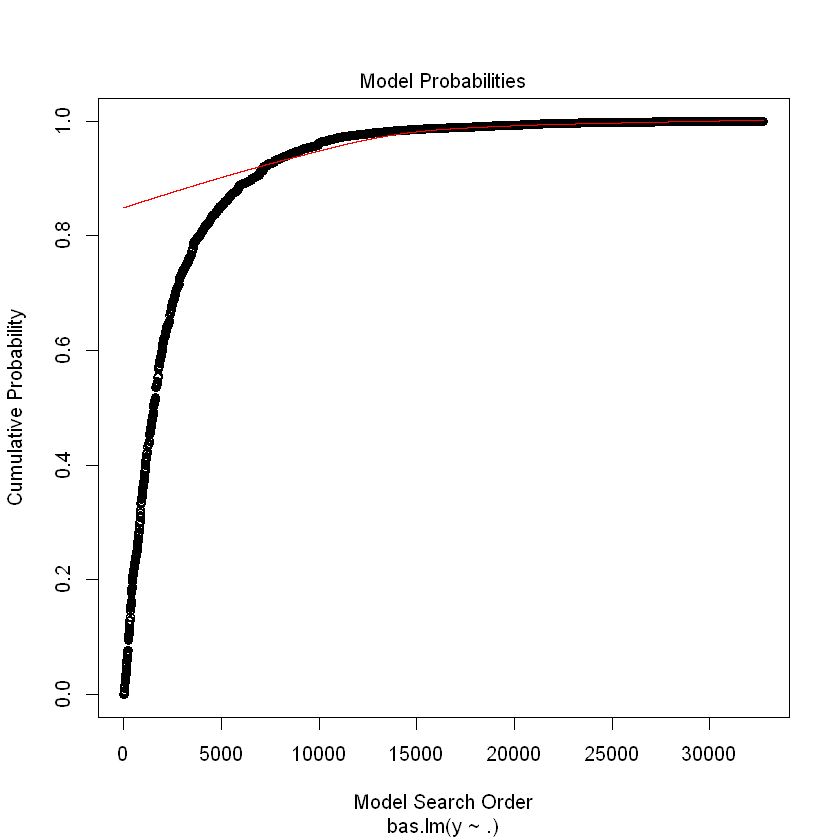

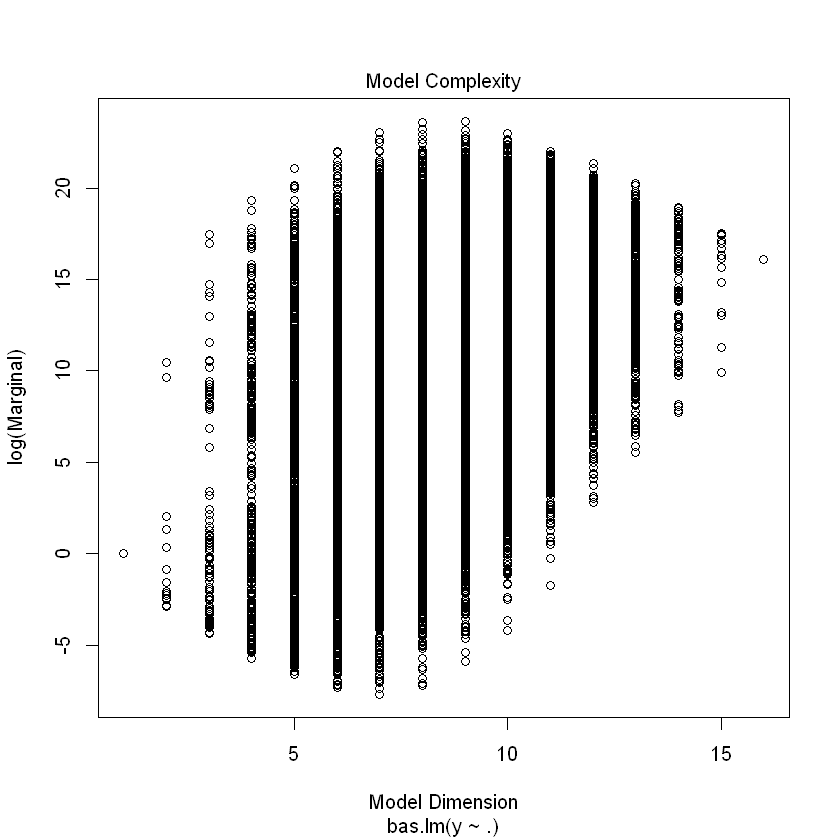

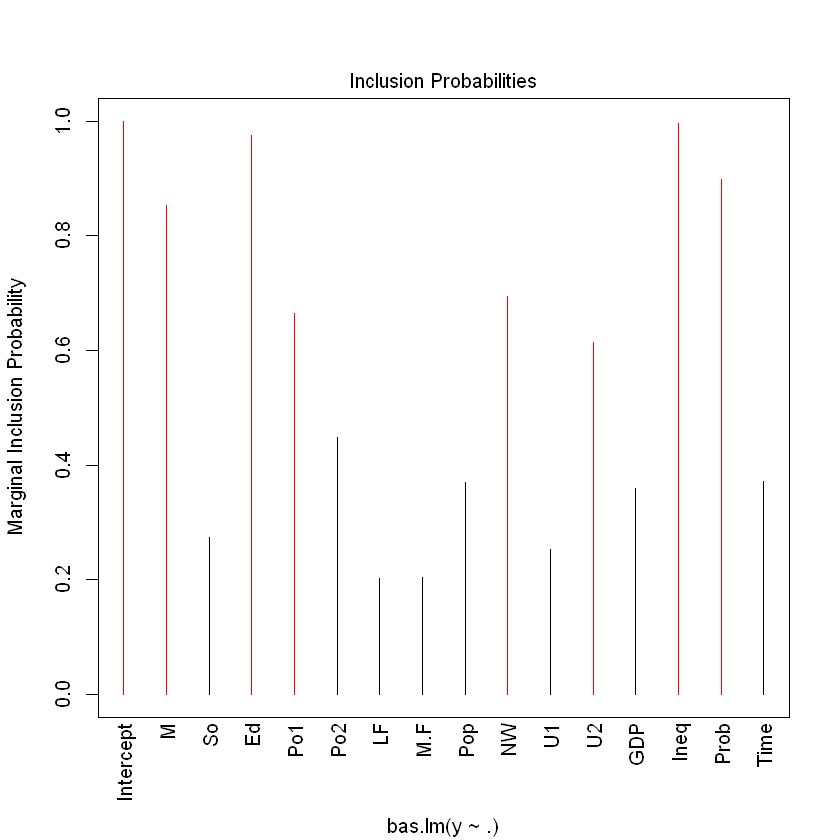

In [41]:
plot(crime.ZS, ask = F)

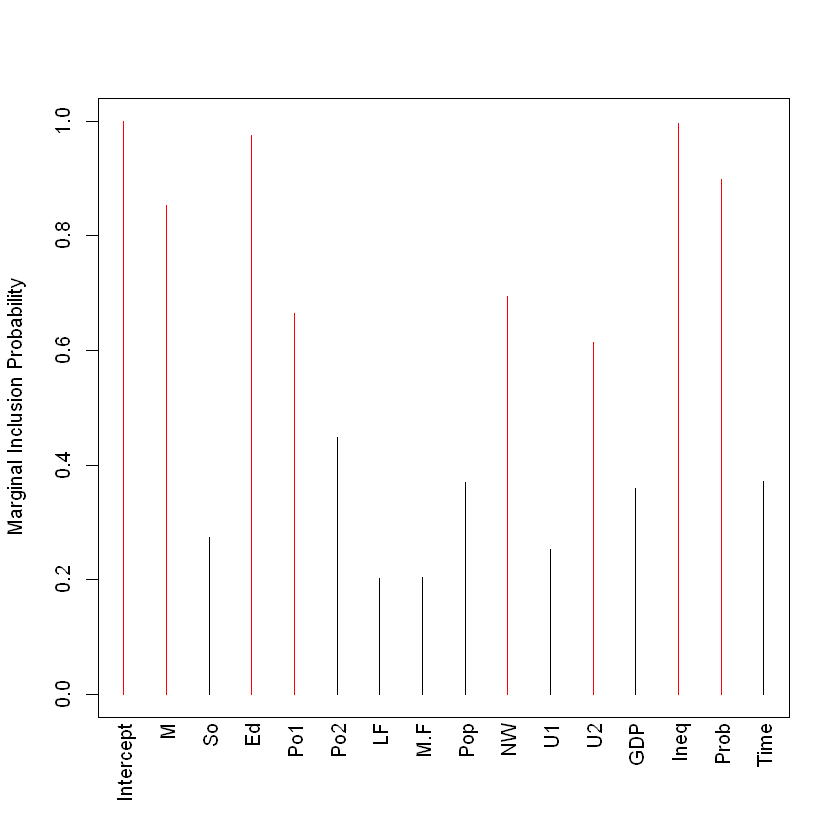

In [42]:
plot(crime.ZS, which = 4, ask = FALSE, caption = "", sub.caption = "")

In [43]:
crime.ZS


Call:
bas.lm(formula = y ~ ., data = UScrime, prior = "ZS-null", modelprior = uniform(), 
    initprobs = "eplogp", force.heredity = FALSE, pivot = TRUE)


 Marginal Posterior Inclusion Probabilities: 
Intercept          M         So         Ed        Po1        Po2         LF  
   1.0000     0.8536     0.2737     0.9747     0.6652     0.4490     0.2022  
      M.F        Pop         NW         U1         U2        GDP       Ineq  
   0.2050     0.3696     0.6944     0.2526     0.6149     0.3601     0.9965  
     Prob       Time  
   0.8992     0.3718  

In [44]:
options(width = 80)
summary(crime.ZS)

,P(B != 0 | Y),model 1,model 2,model 3,model 4,model 5
Intercept,1.0000000,1.00000,1.0000000,1.0000000,1.000000,1.0000000
M,0.8535720,1.00000,1.0000000,1.0000000,1.000000,1.0000000
So,0.2737083,0.00000,0.0000000,0.0000000,0.000000,0.0000000
Ed,0.9746605,1.00000,1.0000000,1.0000000,1.000000,1.0000000
Po1,0.6651553,1.00000,1.0000000,0.0000000,1.000000,1.0000000
Po2,0.4490097,0.00000,0.0000000,1.0000000,0.000000,0.0000000
LF,0.2022374,0.00000,0.0000000,0.0000000,0.000000,0.0000000
M.F,0.2049659,0.00000,0.0000000,0.0000000,0.000000,0.0000000
Pop,0.3696150,0.00000,0.0000000,0.0000000,1.000000,0.0000000
NW,0.6944069,1.00000,1.0000000,1.0000000,1.000000,0.0000000


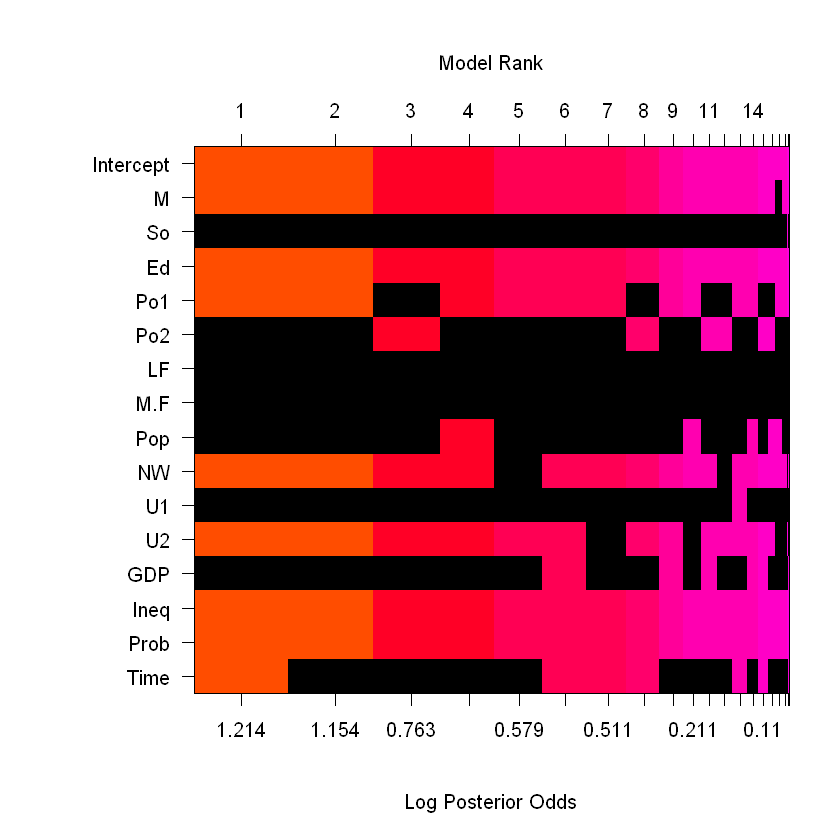

In [45]:
image(crime.ZS, rotate = F)

In [46]:
coef.ZS <- coef(crime.ZS)

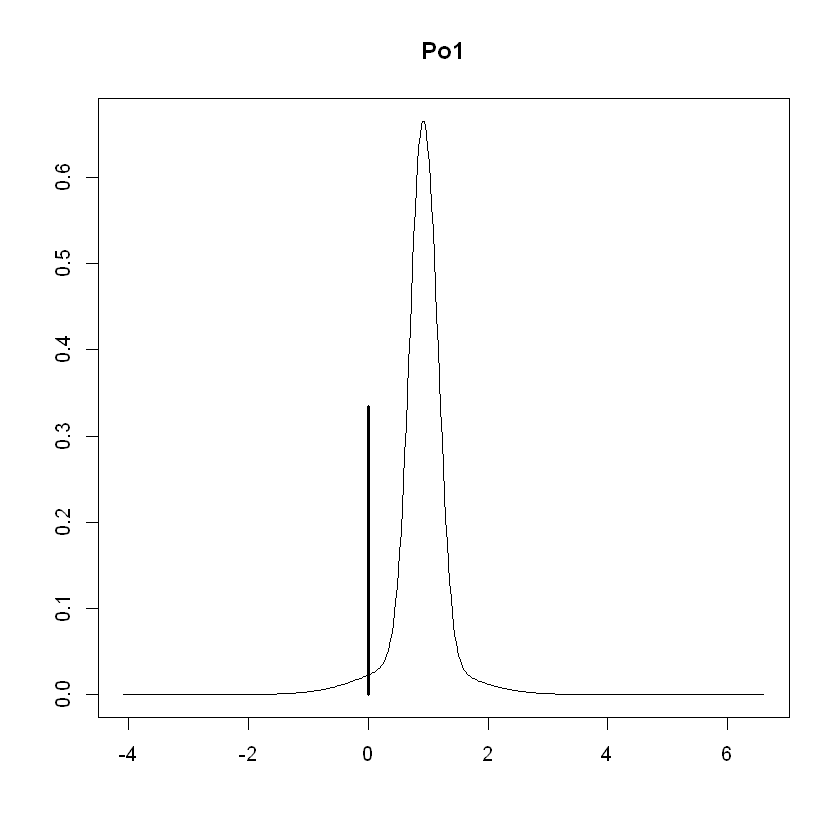

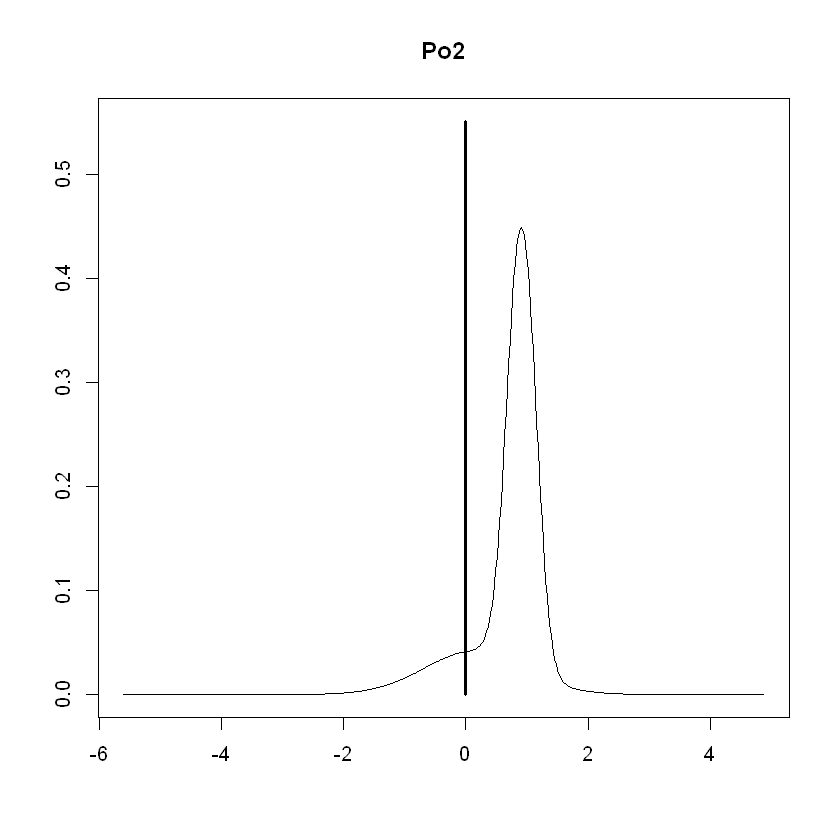

In [47]:
plot(coef.ZS, subset = c(5:6), ask = F)

In [48]:
confint(coef.ZS)

                   2.5%        97.5%        beta
Intercept  6.6664509035 6.7808055915  6.72493620
M          0.0000000000 2.1945632652  1.14359433
So        -0.0484483246 0.3146559024  0.03547522
Ed         0.6164311846 3.1687309261  1.85848834
Po1       -0.0006582864 1.4533977461  0.60067372
Po2       -0.2093887954 1.4771530647  0.31841766
LF        -0.5559286910 0.9951780232  0.05933737
M.F       -2.0790694377 1.9760282963 -0.02702786
Pop       -0.1284871962 0.0028451797 -0.02248283
NW         0.0000000000 0.1660304323  0.06668437
U1        -0.5169144266 0.3618085608 -0.02456854
U2        -0.0017258753 0.6806110579  0.20702927
GDP       -0.0507588432 1.1663527994  0.20625063
Ineq       0.6921374162 2.1366711374  1.39012647
Prob      -0.4136879229 0.0001489313 -0.21536203
Time      -0.5232298290 0.0540941723 -0.08433479
attr(,"Probability")
[1] 0.95
attr(,"class")
[1] "confint.bas"

NULL

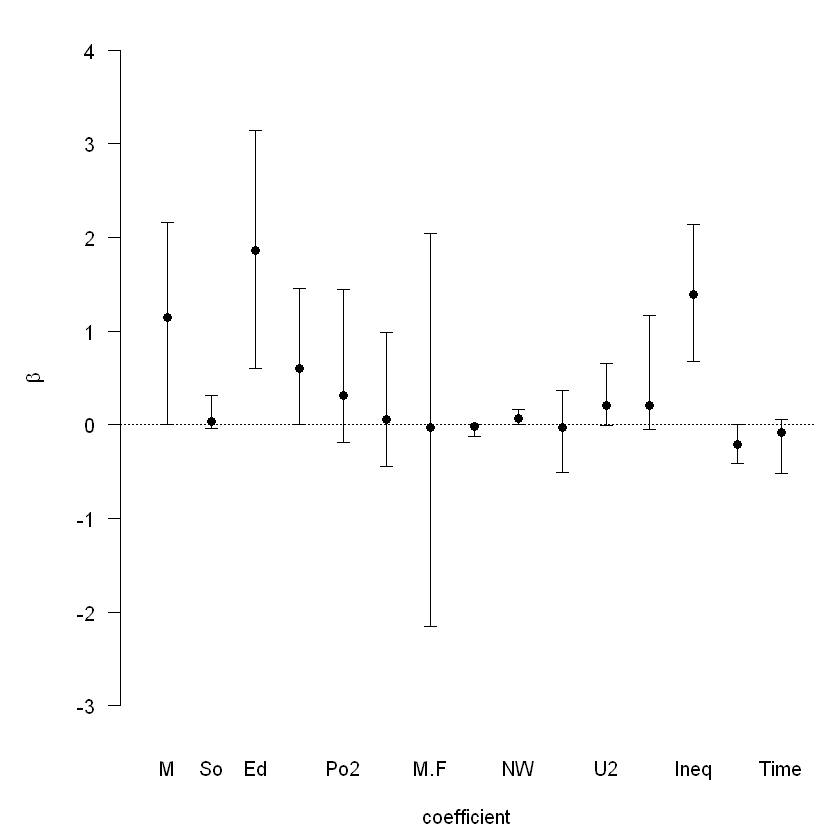

In [49]:
plot(confint(coef.ZS, parm = 2:16))

NULL

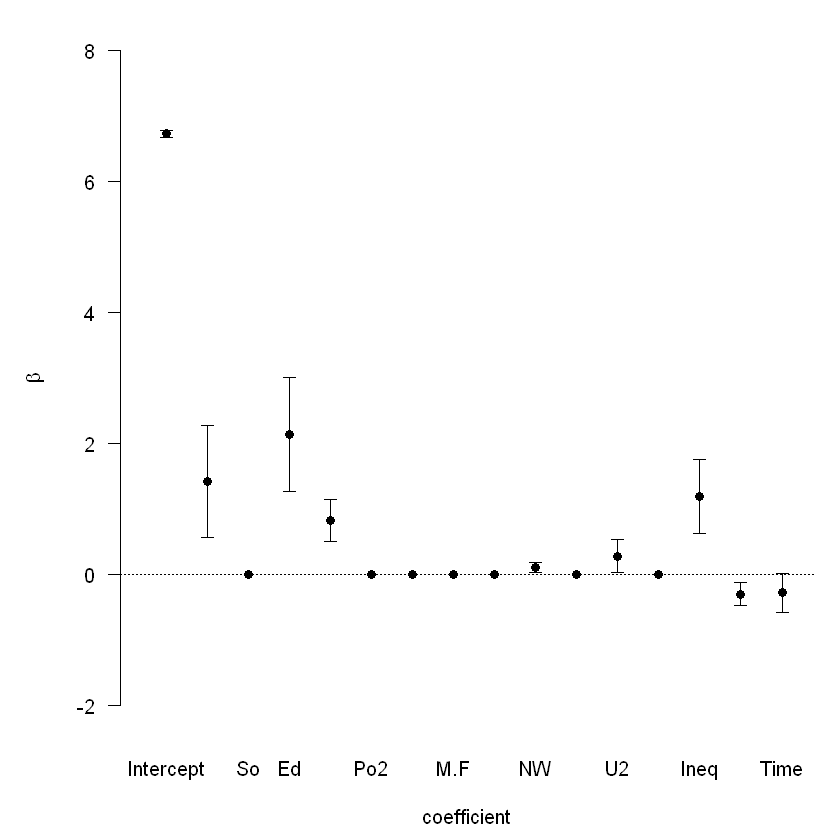

In [50]:
plot(confint(coef(crime.ZS, estimator = "HPM")))

NULL

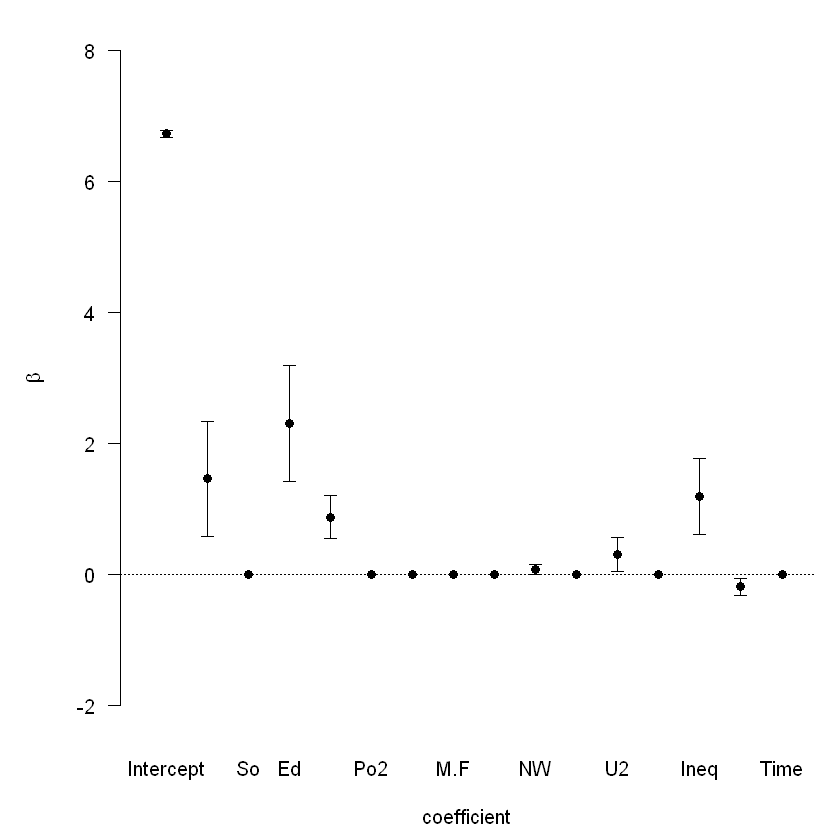

In [51]:
plot(confint(coef(crime.ZS, estimator = "MPM")))

In [52]:
muhat.BMA <- fitted(crime.ZS, estimator = "BMA")
BMA <- predict(crime.ZS, estimator = "BMA")

# predict has additional slots for fitted values under BMA, predictions under each model
names(BMA)

[1] "fit"         "Ybma"        "Ypred"       "postprobs"   "se.fit"     
 [6] "se.pred"     "se.bma.fit"  "se.bma.pred" "df"          "best"       
[11] "bestmodel"   "best.vars"   "estimator"

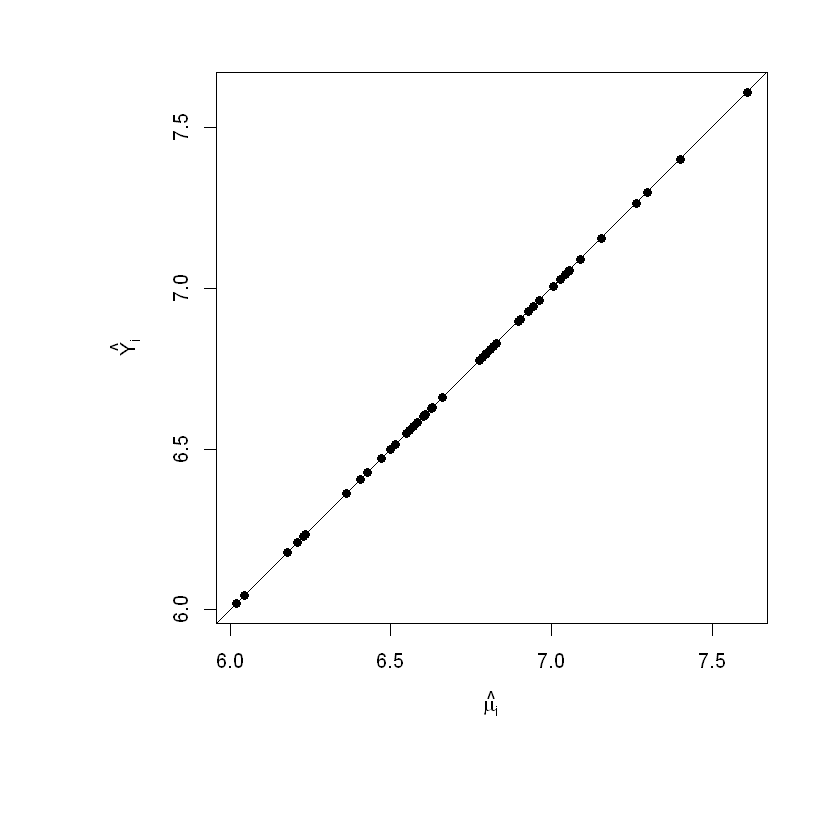

In [53]:
par(mar = c(9, 9, 3, 3))
plot(muhat.BMA, BMA$fit,
  pch = 16,
  xlab = expression(hat(mu[i])), ylab = expression(hat(Y[i]))
)
abline(0, 1)

In [54]:
HPM <- predict(crime.ZS, estimator = "HPM")

# show the indices of variables in the best model where 0 is the intercept
HPM$bestmodel

[1]  0  1  3  4  9 11 13 14 15

In [55]:
variable.names(HPM)

[1] "Intercept" "M"         "Ed"        "Po1"       "NW"        "U2"       
[7] "Ineq"      "Prob"      "Time"

In [56]:
MPM <- predict(crime.ZS, estimator = "MPM")
variable.names(MPM)

[1] "Intercept" "M"         "Ed"        "Po1"       "NW"        "U2"       
[7] "Ineq"      "Prob"

In [57]:
BPM <- predict(crime.ZS, estimator = "BPM")
variable.names(BPM)

[1] "Intercept" "M"         "So"        "Ed"        "Po1"       "Po2"      
 [7] "M.F"       "NW"        "U2"        "Ineq"      "Prob"

In [59]:
install.packages("GGally")

also installing the dependencies 'isoband', 'glue', 'tibble', 'tidyselect', 'pillar', 'farver', 'ggplot2', 'dplyr', 'reshape', 'scales'





  There are binary versions available but the source versions are later:
        binary source needs_compilation
isoband  0.2.4  0.2.5              TRUE
glue     1.4.2  1.5.1              TRUE
tibble   3.1.1  3.1.6              TRUE
pillar   1.6.0  1.6.4             FALSE
ggplot2  3.3.3  3.3.5             FALSE
dplyr    1.0.6  1.0.7              TRUE
GGally   2.1.1  2.1.2             FALSE

  Binaries will be installed
package 'isoband' successfully unpacked and MD5 sums checked
package 'glue' successfully unpacked and MD5 sums checked
package 'tibble' successfully unpacked and MD5 sums checked
package 'tidyselect' successfully unpacked and MD5 sums checked
package 'farver' successfully unpacked and MD5 sums checked
package 'dplyr' successfully unpacked and MD5 sums checked
package 'reshape' successfully unpacked and MD5 sums checked
package 'scales' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\waelr\AppData\Local\Temp\Rtmp0WIQHf\download

installing the source packages 'pillar', 'ggplot2', 'GGally'




Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



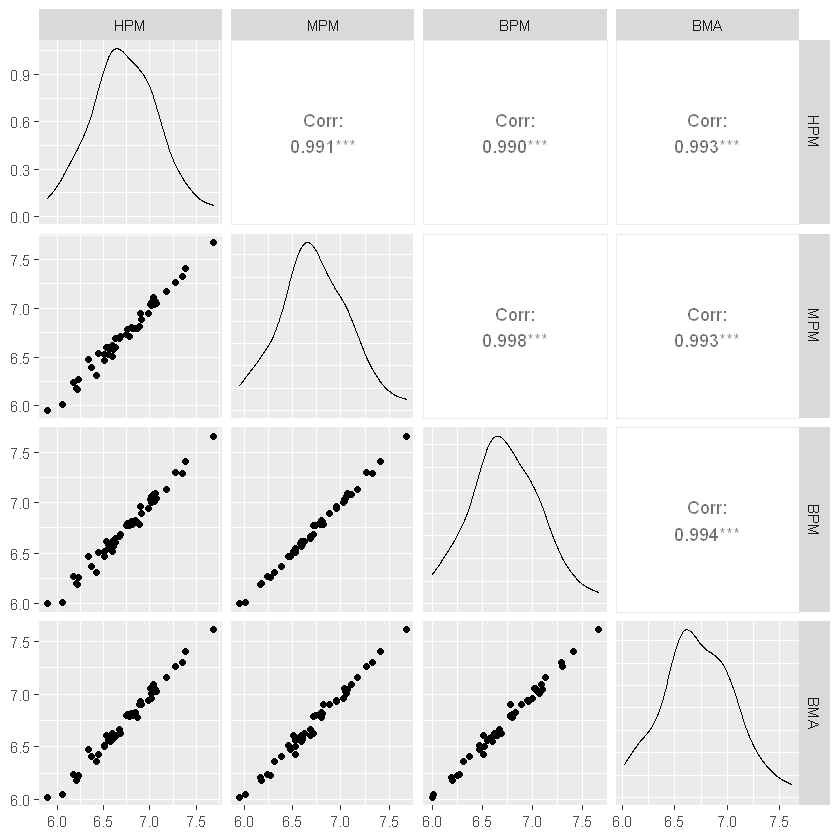

In [60]:
GGally::ggpairs(data.frame(
  HPM = as.vector(HPM$fit), # this used predict so we need to extract fitted values
  MPM = as.vector(MPM$fit), # this used fitted
  BPM = as.vector(BPM$fit), # this used fitted
  BMA = as.vector(BMA$fit)
)) # this used predict

NULL

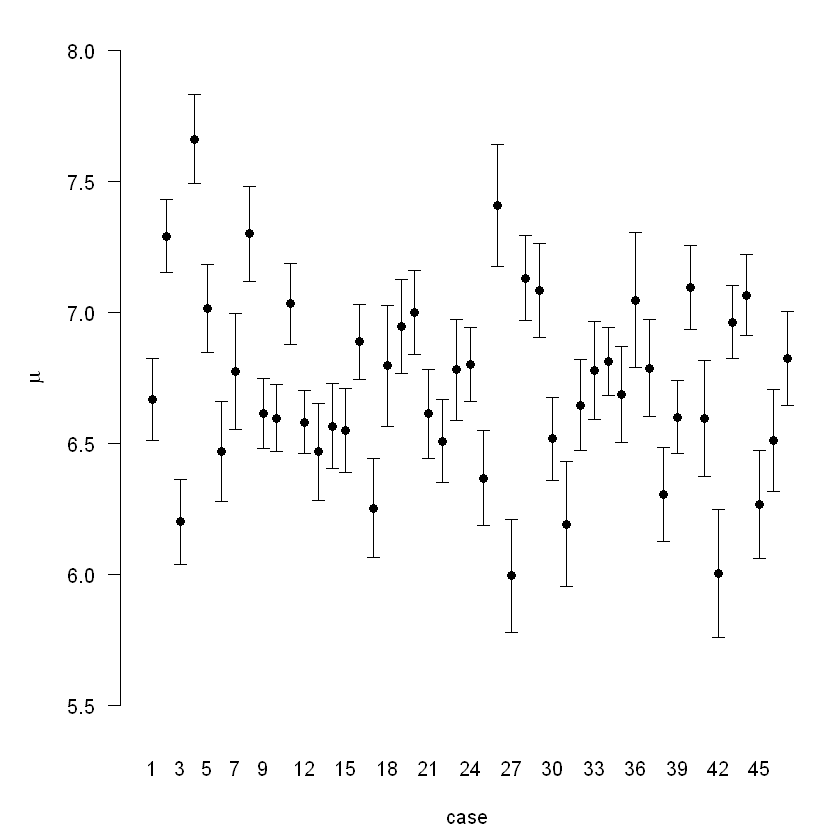

In [61]:
BPM <- predict(crime.ZS, estimator = "BPM", se.fit = TRUE)
crime.conf.fit <- confint(BPM, parm = "mean")
crime.conf.pred <- confint(BPM, parm = "pred")
plot(crime.conf.fit)

NULL

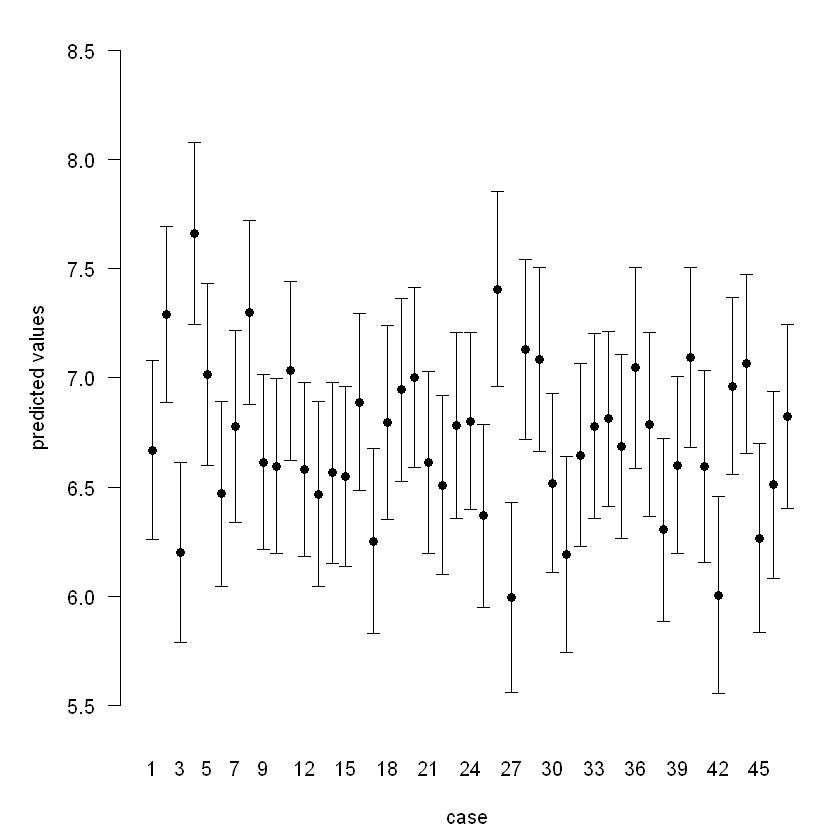

In [62]:
plot(crime.conf.pred)

In [63]:
new.pred <- predict(crime.ZS, newdata = UScrime, estimator = "MPM")

In [64]:
system.time(
  for (i in 1:10) {
    crime.ZS <- bas.lm(y ~ .,
      data = UScrime,
      prior = "ZS-null", method = "BAS",
      modelprior = uniform(), initprobs = "eplogp"
    )
  }
)

   user  system elapsed 
   3.86    0.00    3.86 

In [65]:
system.time(
  for (i in 1:10) {
    crime.ZS <- bas.lm(y ~ .,
      data = UScrime,
      prior = "ZS-null", method = "deterministic",
      modelprior = uniform(), initprobs = "eplogp"
    )
  }
)

   user  system elapsed 
   3.84    0.00    3.86 

In [66]:
crime.ZS <- bas.lm(y ~ .,
  data = UScrime,
  prior = "ZS-null",
  modelprior = uniform(),
  method = "MCMC"
)

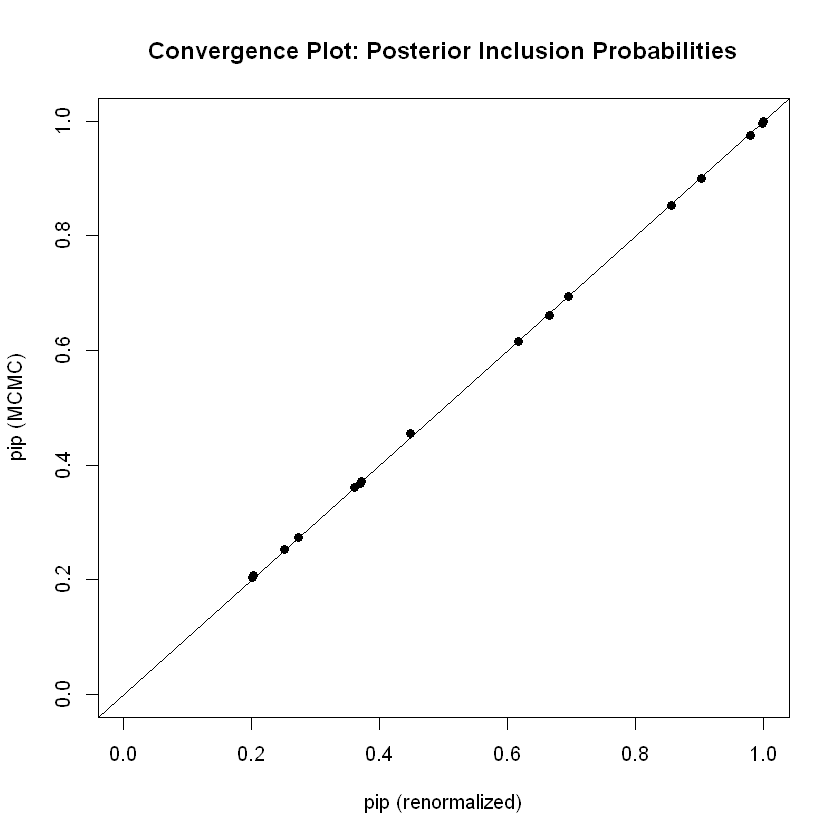

In [67]:
diagnostics(crime.ZS, type = "pip", pch = 16)

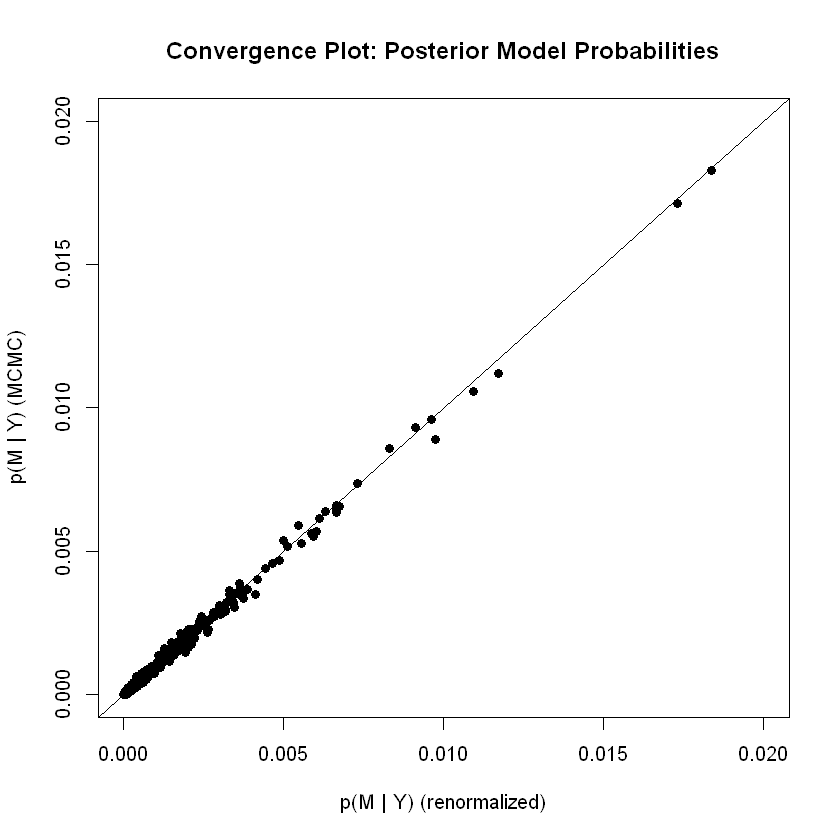

In [68]:
diagnostics(crime.ZS, type = "model", pch = 16)

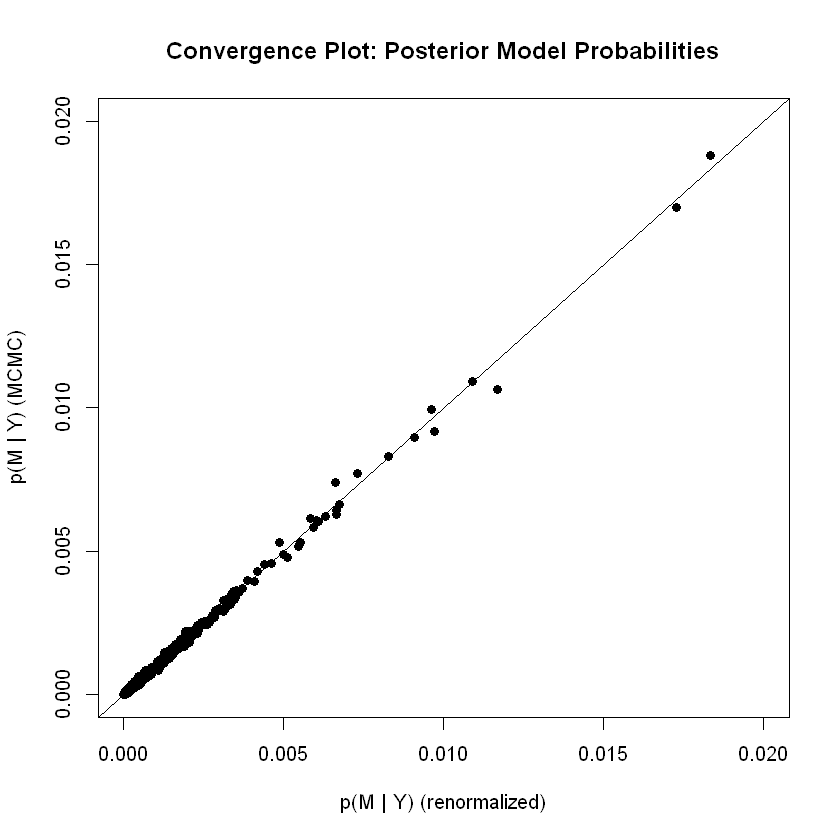

In [69]:
crime.ZS <- bas.lm(y ~ .,
  data = UScrime,
  prior = "ZS-null",
  modelprior = uniform(),
  method = "MCMC", MCMC.iterations = 10^6
)

diagnostics(crime.ZS, type="model", pch=16)

In [70]:
data("stackloss")
stackloss <- cbind(stackloss, diag(nrow(stackloss)))
stack.bas <- bas.lm(stack.loss ~ .,
  data = stackloss,
  method = "MCMC", initprobs = "marg-eplogp",
  prior = "ZS-null",
  modelprior = tr.poisson(4, 10),
  MCMC.iterations = 200000
)

In [71]:
knitr::kable(as.data.frame(summary(stack.bas)))

ERROR: Error in library.dynam(lib, package, package.lib): DLL 'xfun' not found: maybe not installed for this architecture?
